# **FLICKFLARE**


![FlickFlareLogo](Images_Movie_Recommendation_System/FlickFlareLogo.PNG)









### **Project Phase 4**

### **Authors**
#### Kelvin Mwaura
#### Abigael Nyabaga
#### Prossy Nansubuga

# **Movie Recommender System**
## **Overview: FlickFlare**

FlickFlare is a cutting-edge movie streaming platform designed to bring a diverse and expansive collection of films directly to your screen. Whether you're a fan of classic cinema, indie gems, or the latest blockbuster hits, FlickFlare has something for everyone.

To enhance user satisfaction and ensure that our movie recommendations align with user interests, we are introducing a sophisticated movie recommender system. This system will leverage user ratings and genre preferences to suggest the top 5 movies tailored to individual tastes.

## **Business Understanding**
### **Problem Statement**

FlickFlare, a movie streaming company, received feedback from users on the Google Play Store indicating that the movies recommended to them did not match their interests, leading to customer dissatisfaction.

To address this issue, FlickFlare has approached us, RODATA-a data analytics company, to build a movie recommender system. This system will aid in suggesting the top 5 movies to users based on their ratings and preferred genres.

## **Objectives**

###  **Main Objective**

    To build a movie recommender system that suggests top movies to streaming users based on movie ratings and preferred genres.

### Specific Objectives
1. **Recommendation Accuracy**: Design an algorithm to precisely identify and recommend the top five movies that match user ratings and preferred genres, ensuring high relevance to individual preferences.
2. **Boosting User Interaction**: Develop a recommendation system aimed at significantly enhancing user engagement by providing personalized movie suggestions, leading to increased interaction and longer viewing times.
3. **Customized Movie Suggestions**: Create tailored recommendations that align with each user's unique interests and viewing patterns.
4. **Improving Recommendation Precision**: Enhance the algorithm's accuracy over time by incorporating user feedback and continuously refining the recommendation process to better match user preferences.

### **Metric for Success**
To achieve the success metrics for the recommendation system, below is structured approach that we shall use to ensure we meet both the Recommendation Accuracy and User Interaction goals

1. **Recommendation Accuracy**
   
    Goal: Achieve at least 80% accuracy in recommending the top five movies.
    Steps:
        Prepare Data: Clean and preprocess movie ratings and genre data.
        Modeling: Use collaborative filtering, content-based filtering, or a hybrid approach.
        Evaluate: Measure accuracy with precision, recall, and top-K metrics.
        Tune and Validate: Optimize parameters and use cross-validation.
        Test: Deploy and test with users, adjust based on feedback.

3. **User Interaction**

    Goal: Increase user engagement (interaction rates and average viewing time) by at least 20% within three months.
    Steps:
        Track Metrics: Define and monitor current engagement metrics.
        Deploy System: Launch the recommendation system and promote new features.
        Measure Impact: Compare pre- and post-deployment metrics.
        Optimize: Use user feedback to refine the system.
        Report: Create reports on engagement improvements and adjust strategies as needed.


### **Data Understanding**

The data used has been sourced from the MovieLens dataset from the GroupLens research lab at the University of Minnesota.

It contains 100,836 ratings and 3,683 tag applications across 9,742 movies. These data were created by 610 users.

The dataset is distributed among four CSV files:

    links.csv
    movies.csv
    ratings.csv
    tags.csv

1. **movies.csv**

Each line of this file after the header row represents one movie and has the following columns:

    movieId: Unique ID for each movie
    title: Name of the movie followed by its year of release
    genres: Categories that a movie might fall into, separated by |

2. **links.csv**

This file contains identifiers that can be used to link this data to other data sources like IMDb. Each line of this file after the header row represents one IMDb link and has the following columns:

    movieId: Unique ID for each movie as used by MovieLens
    imdbId: Unique ID for each movie as used by IMDb
    tmdbId: Unique ID for each movie as used by The Movie Database (TMDb)

3. **tags.csv**

Each line of this file after the header row represents one tag applied to one movie by one user and has the following columns:

    userId: Unique ID for each user
    movieId: Unique ID for each movie
    tag: User-generated metadata about the movie in the form of short, meaningful phrases
    timestamp: Time when the tag was provided by the user

4. **ratings.csv**

Each line of this file after the header row represents one rating and has the following columns:

    userId: Unique ID for each user
    movieId: Unique ID for each movie
    rating: Rating given by the user for the movie. Ratings are made on a 5-star scale with 0.5 increments
    timestamp: Time when the rating was given

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the different datasets into pandas DataFrames
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')

# Displaying the first few rows of each DataFrame to confirm successful loading
print("Tags DataFrame:")
print(tags_df.head())

print("\nMovies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nLinks DataFrame:")
print(links_df.head())


Tags DataFrame:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4

In [142]:
# printing the number of records in every dataframe
dataframes = [links_df, movies_df, ratings_df, tags_df]
dataframe_names = ['links_df', 'movies_df', 'ratings_df', 'tags_df']

for i in range(len(dataframes)):
    print(f" {dataframe_names[i]} has {dataframes[i].shape[0]} records.")

 links_df has 9742 records.
 movies_df has 9742 records.
 ratings_df has 100836 records.
 tags_df has 3683 records.


### **Inspect and Handle Missing Values**

    Check for Missing Values: We will determine if there are any missing values in the DataFrames.

In [143]:
print("Missing values in tags_df:")
print(tags_df.isnull().sum())

print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())

print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())

print("\nMissing values in links_df:")
print(links_df.isnull().sum())


Missing values in tags_df:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in movies_df:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in links_df:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


### **Review Missing Data:**

**Implications of Missing tmdbId Values:**

1. **Data Integrity:** The missing tmdbId values mean that there are some records where the unique identifier for movies is absent. This can lead to incomplete information when attempting to link or fetch movie details.

2. **Potential Issues in Analysis:** If we need to perform operations like merging with other datasets that use tmdbId, these records will not match and may result in missing data or errors in your analysis.

3. **Impact on Model Training:** For machine learning models or recommendations, missing identifiers can lead to incomplete data for feature engineering, which can affect model performance and accuracy.

**Steps Taken to Handle Missing Values:**

1. Identified Missing Records:
2. Dropping Rows with Missing tmdbId

In [144]:
missing_tmdb_ids = links_df[links_df['tmdbId'].isnull()]
print("\nRecords with missing tmdbId:")
print(missing_tmdb_ids)



Records with missing tmdbId:
      movieId  imdbId  tmdbId
624       791  113610     NaN
843      1107  102336     NaN
2141     2851   81454     NaN
3027     4051   56600     NaN
5532    26587   92337     NaN
5854    32600  377059     NaN
6059    40697  105946     NaN
7382    79299  874957     NaN


In [145]:
# Check for any remaining missing values in all DataFrames
print("\nMissing values in tags_df:")
print(tags_df.isnull().sum())

print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())

print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())

print("\nMissing values in links_df:")
print(links_df.isnull().sum())



Missing values in tags_df:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in movies_df:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in links_df:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


In [146]:
# Check for duplicates in all DataFrames
print("\nDuplicates in tags_df:")
print(tags_df.duplicated().sum())

print("\nDuplicates in movies_df:")
print(movies_df.duplicated().sum())

print("\nDuplicates in ratings_df:")
print(ratings_df.duplicated().sum())

print("\nDuplicates in links_df:")
print(links_df.duplicated().sum())

# Remove duplicates if found
tags_df.drop_duplicates(inplace=True)
movies_df.drop_duplicates(inplace=True)
ratings_df.drop_duplicates(inplace=True)
links_df.drop_duplicates(inplace=True)



Duplicates in tags_df:
0

Duplicates in movies_df:
0

Duplicates in ratings_df:
0

Duplicates in links_df:
0


In [147]:
# Genre Processing: Split the genres in the `movies.csv` dataset into lists for easier analysis

movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split('|'))
movies_df

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


**Convert timestamp into datetime object**

Purpose: Converts timestamps from Unix epoch time (seconds since 1970-01-01) to datetime objects.

Parameter unit='s': Specifies that the timestamps are in seconds. If your timestamps are in milliseconds, you would use unit='ms'.

The function below is designed to convert timestamp values into datetime objects, which is useful for time-based analysis.

In [148]:


# Convert timestamps to datetime
tags_df['timestamp'] = pd.to_datetime(tags_df['timestamp'], unit='s')
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')



**Join DataFrames**

We shall now join movies_df with tags_df and ratings_df, and include links_df:

In [149]:
# Join movies_df with tags_df on 'movieId'
movies_tags_df = pd.merge(movies_df, tags_df, on='movieId', how='left')

# Join movies_df with ratings_df on 'movieId'
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movieId', how='left')

# Join movies_df with links_df on 'movieId'
movies_links_df = pd.merge(movies_df, links_df, on='movieId', how='left')

# Print shapes and sample data for verification
print("\nMovies and Tags DataFrame:")
print(movies_tags_df.head())
print("\nMovies and Ratings DataFrame:")
print(movies_ratings_df.head())
print("\nMovies and Links DataFrame:")
print(movies_links_df.head())



Movies and Tags DataFrame:
   movieId             title  \
0        1  Toy Story (1995)   
1        1  Toy Story (1995)   
2        1  Toy Story (1995)   
3        2    Jumanji (1995)   
4        2    Jumanji (1995)   

                                              genres  userId  \
0  [Adventure, Animation, Children, Comedy, Fantasy]   336.0   
1  [Adventure, Animation, Children, Comedy, Fantasy]   474.0   
2  [Adventure, Animation, Children, Comedy, Fantasy]   567.0   
3                     [Adventure, Children, Fantasy]    62.0   
4                     [Adventure, Children, Fantasy]    62.0   

                tag           timestamp  
0             pixar 2006-02-04 09:36:04  
1             pixar 2006-01-14 02:47:05  
2               fun 2018-05-02 18:33:33  
3           fantasy 2018-06-12 22:52:09  
4  magic board game 2018-06-12 22:52:12  

Movies and Ratings DataFrame:
   movieId             title  \
0        1  Toy Story (1995)   
1        1  Toy Story (1995)   
2        1  Toy

Handle Missing Values after merging

After merging, there might be missing values if the joined DataFrames had entries not present in movies_df. You might want to handle these, especially for tmdbId in links_df

In [150]:
# Check for missing values
print("Missing values in Movies and Links DataFrame:")
print(movies_links_df.isnull().sum())

# Handle missing values as needed (e.g., fill with default value or drop)
# Example: Drop rows where 'tmdbId' is missing
movies_links_df.dropna(subset=['tmdbId'], inplace=True)


Missing values in Movies and Links DataFrame:
movieId    0
title      0
genres     0
imdbId     0
tmdbId     8
dtype: int64


In [151]:
# Check for duplicate column names
print("Duplicate columns:")
print(movies_links_df.columns[movies_links_df.columns.duplicated()])


Duplicate columns:
Index([], dtype='object')


In [152]:


# Remove duplicate genre columns
# Find duplicated columns
duplicate_columns = movies_links_df.columns[movies_links_df.columns.duplicated()]

# Drop duplicated columns
movies_links_df = movies_links_df.loc[:, ~movies_links_df.columns.duplicated()]

# Verify the DataFrame
print("Columns after removing duplicates:")
print(movies_links_df.columns)
print("\nSample data from cleaned DataFrame:")
print(movies_links_df.head())


Columns after removing duplicates:
Index(['movieId', 'title', 'genres', 'imdbId', 'tmdbId'], dtype='object')

Sample data from cleaned DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  imdbId   tmdbId  
0  [Adventure, Animation, Children, Comedy, Fantasy]  114709    862.0  
1                     [Adventure, Children, Fantasy]  113497   8844.0  
2                                  [Comedy, Romance]  113228  15602.0  
3                           [Comedy, Drama, Romance]  114885  31357.0  
4                                           [Comedy]  113041  11862.0  


In [153]:
print("Final shape of DataFrame:", movies_links_df.shape)


Final shape of DataFrame: (9734, 5)


In [154]:
print("Columns after removing duplicates:")
print(movies_links_df.columns)


Columns after removing duplicates:
Index(['movieId', 'title', 'genres', 'imdbId', 'tmdbId'], dtype='object')


In [155]:
print("Final shape of DataFrame:", movies_links_df.shape)
print("Sample data from cleaned DataFrame:")
movies_links_df.head()


Final shape of DataFrame: (9734, 5)
Sample data from cleaned DataFrame:


,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",113497,8844.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",113228,15602.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",114885,31357.0
4,5,Father of the Bride Part II (1995),[Comedy],113041,11862.0


In [156]:
movies_links_df.dtypes

movieId      int64
title       object
genres      object
imdbId       int64
tmdbId     float64
dtype: object

In [159]:
#This approach ensures that all relevant data from tags_df, ratings_df, and links_df is included in final_df, without duplicating columns like movieId, title, and genre.
final_df = pd.concat([movies_tags_df, movies_ratings_df.drop(columns=['movieId', 'title', 'genres']), movies_links_df.drop(columns=['movieId', 'title', 'genres'])], axis=1)
final_df

,movieId,title,genres,userId,tag,timestamp,userId,rating,timestamp,imdbId,tmdbId
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",336.0,pixar,2006-02-04 09:36:04,1.0,4.0,2000-07-30 18:45:03,114709.0,862.0
1,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",474.0,pixar,2006-01-14 02:47:05,5.0,4.0,1996-11-08 06:36:02,113497.0,8844.0
2,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",567.0,fun,2018-05-02 18:33:33,7.0,4.5,2005-01-25 06:52:26,113228.0,15602.0
3,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",62.0,fantasy,2018-06-12 22:52:09,15.0,2.5,2017-11-13 12:59:30,114885.0,31357.0
4,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",62.0,magic board game,2018-06-12 22:52:12,17.0,4.5,2011-05-18 05:28:03,113041.0,11862.0
...,...,...,...,...,...,...,...,...,...,...,...
100849,NaN,NaN,NaN,NaN,NaN,NaT,184.0,4.0,2018-09-16 14:44:42,NaN,NaN
100850,NaN,NaN,NaN,NaN,NaN,NaT,184.0,3.5,2018-09-16 14:52:25,NaN,NaN
100851,NaN,NaN,NaN,NaN,NaN,NaT,184.0,3.5,2018-09-16 14:56:45,NaN,NaN
100852,NaN,NaN,NaN,NaN,NaN,NaT,184.0,3.5,2018-09-16 15:00:21,NaN,NaN


### **Exploratory Data Analysis (EDA):**
Conduct EDA to understand distributions and relationships in your data.


**Handling Outliers**

To gain deeper insights into our movie dataset, we can extend our analysis to consider outliers in the number of ratings each movie has received. By identifying movies that have an unusually high or low number of ratings, we can uncover patterns related to their popularity. This analysis helps us pinpoint movies that either stand out as exceptionally popular or are less frequently rated, providing valuable information for refining our recommendation system and enhancing user satisfaction.

**Purpose of the Analysis:**
to identify outliers in the number of ratings each movie has received. This helps understand which movies are unusually popular or less frequently rated.

First we will check for outliers in the ratings of  the movies.

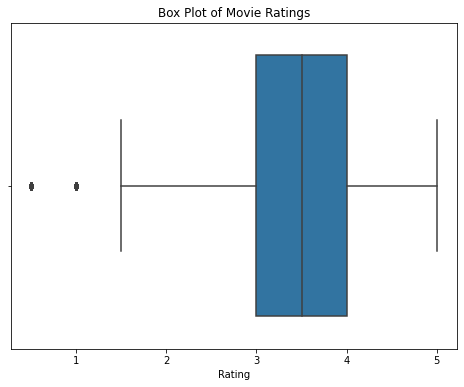

In [ ]:


# Plotting box plot to check for outliers in ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', data=ratings_df)
plt.title('Box Plot of Movie Ratings')
plt.xlabel('Rating')
plt.show()

This indicates the presence of outliers in our ratings dataset, specifically with ratings between 0 and 1.5. We will investigate this further by focusing on the ratings for a specific movie and examining the outliers in those ratings.

In [ ]:
# Calculate the number of ratings each movie has received
movie_rating_counts = ratings_df['movieId'].value_counts().reset_index()
movie_rating_counts.columns = ['movieId', 'rating_count']

# Merge with movies_df to get movie titles
movies_with_counts = pd.merge(movies_df, movie_rating_counts, on='movieId')

# Display the first few rows
print(movies_with_counts.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  rating_count  
0  [Adventure, Animation, Children, Comedy, Fantasy]           215  
1                     [Adventure, Children, Fantasy]           110  
2                                  [Comedy, Romance]            52  
3                           [Comedy, Drama, Romance]             7  
4                                           [Comedy]            49  


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for rating counts
Q1 = movies_with_counts['rating_count'].quantile(0.25)
Q3 = movies_with_counts['rating_count'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = movies_with_counts[(movies_with_counts['rating_count'] < lower_bound) | (movies_with_counts['rating_count'] > upper_bound)]
non_outliers = movies_with_counts[(movies_with_counts['rating_count'] >= lower_bound) & (movies_with_counts['rating_count'] <= upper_bound)]

# Count the number of outliers and non-outliers
outlier_count = len(outliers)
non_outlier_count = len(non_outliers)

print(f"Number of outliers: {outlier_count}")
print(f"Number of non-outliers: {non_outlier_count}")

Number of outliers: 1179
Number of non-outliers: 8545


This shows the presence of outliers in our movies_with_counts dataset.

While the majority of movie ratings are within a normal range, there are a significant number of outliers, which are further illustrated in the bar graph.

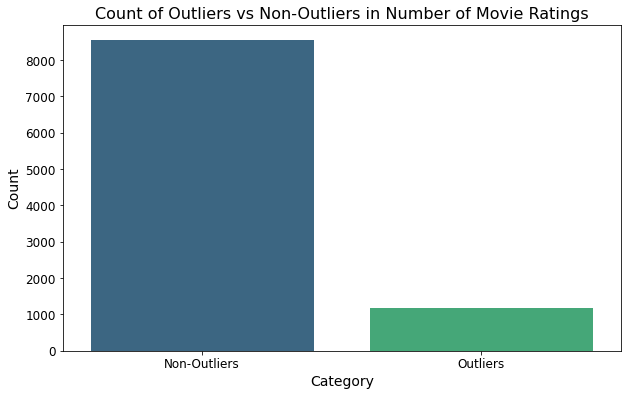

In [ ]:
# Data for the bar graph
data = {'Category': ['Non-Outliers', 'Outliers'], 'Count': [non_outlier_count, outlier_count]}

# Create DataFrame for the bar graph
outlier_df = pd.DataFrame(data)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=outlier_df, palette='viridis')
plt.title('Count of Outliers vs Non-Outliers in Number of Movie Ratings', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Our data contains outliers that we cannot remove due to their sensitivity and importance to our analysis. The graph above illustrates the distribution of ratings both with and without these outliers. The distributions appear to be only slightly different, indicating that removing the outliers may not be necessary.

**Univariate Analysis**

Our key features for univariate analysis:

genres: To analyze the distribution of different genres.

rating: To analyze the distribution of ratings given by users.

To analyze the top 10 movies based off the number of ratings from users

These columns are essential for univariate analysis as they provide valuable insights into the distribution and characteristics of genres,  and ratings within the dataset.

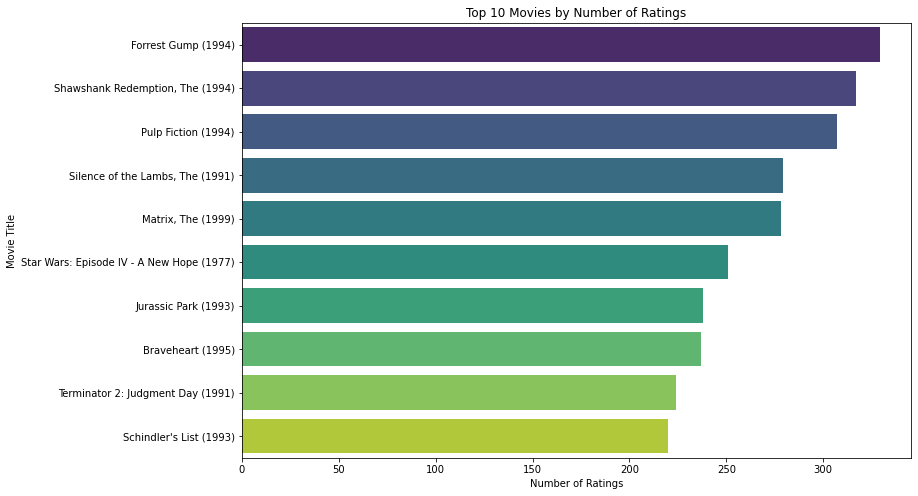

In [172]:
# Group by movie title and count the number of ratings
movie_rating_counts = movies_ratings_df.groupby('title').size().reset_index(name='count')

# Sort movies by the count of ratings in descending order
sorted_movies = movie_rating_counts.sort_values(by='count', ascending=False)

# : Limit to the top 10 movies based on rating counts
top_10_movies = sorted_movies.head(10)

# Step 4: Plot the top 10 movies by rating count
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='title', data=top_10_movies, palette='viridis')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Number of Ratings')
plt.show()

The visualisation above shows the top 10 movies as per the number of ratings by the users with Forest Gump fiction having the most amount of ratings

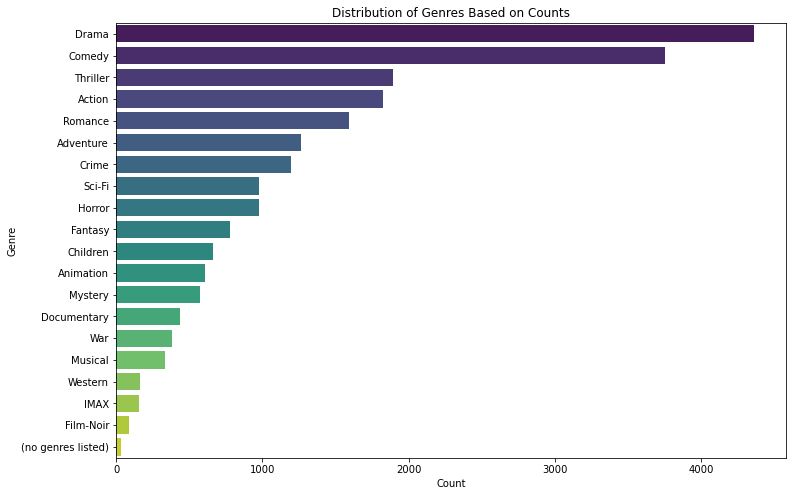

In [176]:


#  Flatten the lists of genres
genres_flat = movies_df['genres'].explode().reset_index(drop=True)

# Convert to DataFrame and name the column
genres_df = genres_flat.to_frame(name='genre')

#  Count the occurrences of each genre
genre_counts = genres_df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

#  Sort genres by count in descending order
genre_counts_sorted = genre_counts.sort_values(by='count', ascending=False)

# Create a bar plot to show the distribution of genres
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='genre', data=genre_counts_sorted, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Genres Based on Counts')
plt.show()


The genre with the highest number of movies produced is the 'Drama' gener which suggests that it is likely the most watched genre.

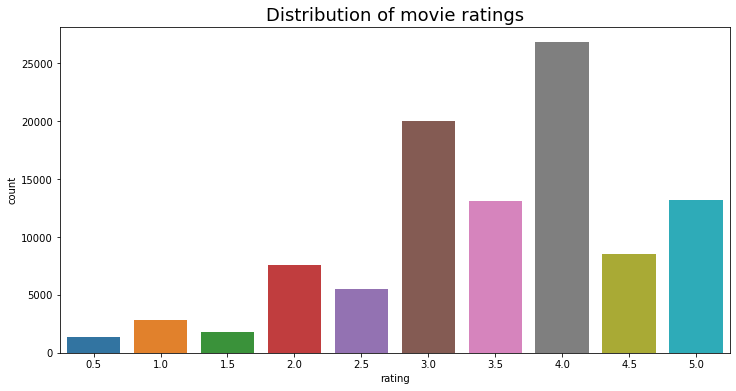

In [ ]:


# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create the countplot
sns.countplot(x='rating', data=ratings_df)

# Set the title with a larger font size
plt.title("Distribution of movie ratings", fontsize=18)

# Show the plot
plt.show()


The most common rating is 4.0 stars, with around 27,000 movies receiving this rating.

The second most common rating is 3.0 stars, with approximately 20,000 movies.

There's a general trend of ratings increasing from 0.5 to 4.0 stars, then decreasing for 4.5 and 5.0 stars.

Very low ratings (0.5 and 1.0 stars) are relatively uncommon, with fewer than 5,000 movies for each.

**Bivariate Analysis**

To understand the relationship between user preferences and movie recommendations, we need to :
1. **visualize the top ten movies**:This is done by grouping movies according to their ratings and compairing movie title of top rated movies ie.with a rating of 5, against the number of ratings it was given.
2. **Create a correlation matrix:** to show the correlation between movie genres. This would be useful in recommending a different genre of movies to a person if the movie genres have a high positive correlation.
3. **Compaire individuals preference:** This enables further personalization movie recommendation.

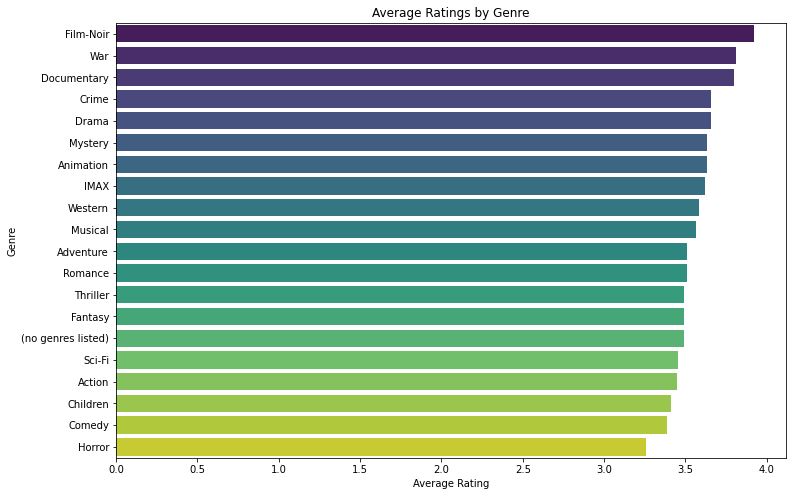

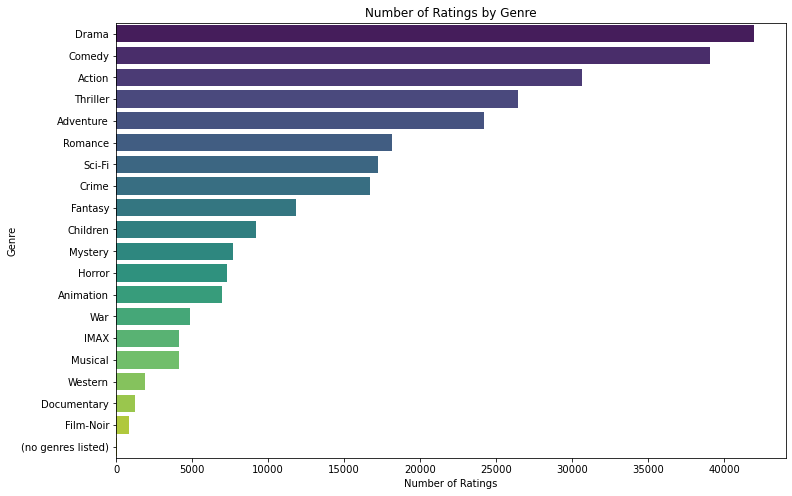

In [178]:


#  Flatten the lists of genres
genres_flat = movies_df[['movieId', 'genres']].explode('genres')

#  Merge with ratings data
genres_ratings = pd.merge(genres_flat, ratings_df, on='movieId', how='left')

#  Aggregate ratings by genre
genre_ratings = genres_ratings.groupby('genres')['rating'].agg(['mean', 'count']).reset_index()
genre_ratings.columns = ['genre', 'average_rating', 'rating_count']

#  Create a bar plot to show average ratings by genre
plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='genre', data=genre_ratings.sort_values(by='average_rating', ascending=False), palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Ratings by Genre')
plt.show()

#  Create a bar plot to show the number of ratings per genre
plt.figure(figsize=(12, 8))
sns.barplot(x='rating_count', y='genre', data=genre_ratings.sort_values(by='rating_count', ascending=False), palette='viridis')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.title('Number of Ratings by Genre')
plt.show()


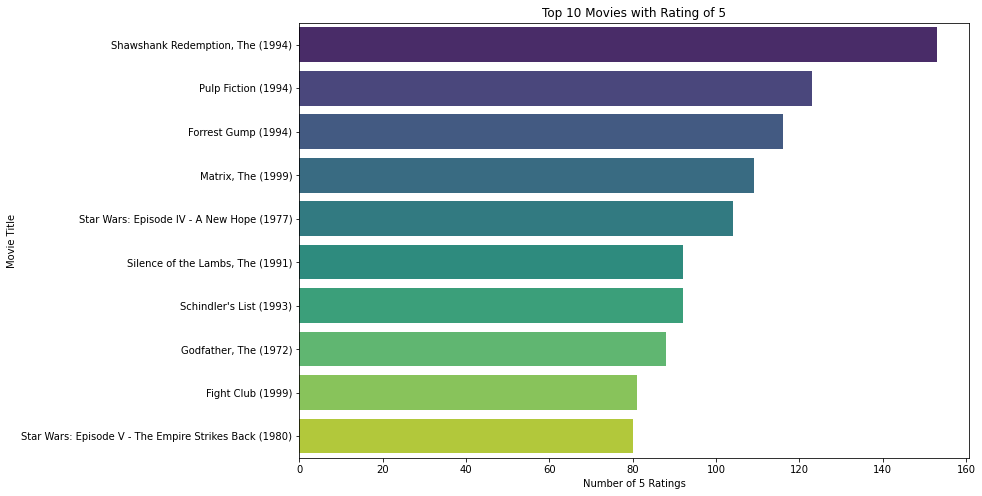

In [ ]:
# Filter movies with a rating of 5
top_rated_movies = movies_ratings_df[movies_ratings_df['rating'] == 5]

# Group by movie title and count the number of occurrences
top_rated_movies_counts = top_rated_movies.groupby('title').size().reset_index(name='count')

# Sort movies by count in descending order
top_rated_movies_sorted = top_rated_movies_counts.sort_values(by='count', ascending=False)

# Limit to top 10 movies
top_10_rated_movies = top_rated_movies_sorted.head(10)

# Plot the top 10 movies with a rating of 5
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='title', data=top_10_rated_movies, palette='viridis')
plt.xlabel('Number of 5 Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Rating of 5')
plt.show()

we use the correlation matrix to identify which genres are typically rated similarly by users. For example, if Action and Thriller have a high positive correlation, it might suggest that users who enjoy Action movies also enjoy Thrillers.

In [177]:
# Calculate the correlation matrix
correlation_matrix = movies_ratings_df[['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Ratings for Different Genres')
plt.show()

KeyError: "None of [Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance'], dtype='object')] are in the [columns]"

There seems to be a week negative and positive correlation between the top five. This implies that they do not influence each other's ratings. Users who like one genre are not necessarily inclined to like or dislike another genre. This might also mean that users have diverse tastes, and their preferences for different genres are not strongly linked.
For a recommendation system, weak correlations mean that recommending one genre based on another might not be very effective. For example, if Action and Romance have a weak correlation, suggesting a Romance movie to a user who likes Action movies may not be very effective.Hence the need to visualize user preferences.

To create tailored recommendations that align with each user's unique interests and viewing patterns.we will visualize a user preferences.this shows individual users' preferences for different genres of movies.

In [ ]:
# Select relevant columns
data = movies_tags_df[['userId', 'Drama', 'Comedy', 'Thriller', 'Action', 'Romance']]

# Replace NaN with 0 in genre columns
data = data.fillna(0)

# Calculate user preferences by averaging the genre columns
user_preferences = data.groupby('userId').mean().reset_index()

# Define genre columns
genre_columns = ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']

# Keep only userId and genre columns
preferences = user_preferences[['userId'] + genre_columns]

# Set userId as the index
preferences.set_index('userId', inplace=True)
# Reduce the number of users to 5
preferences = preferences.head(10)

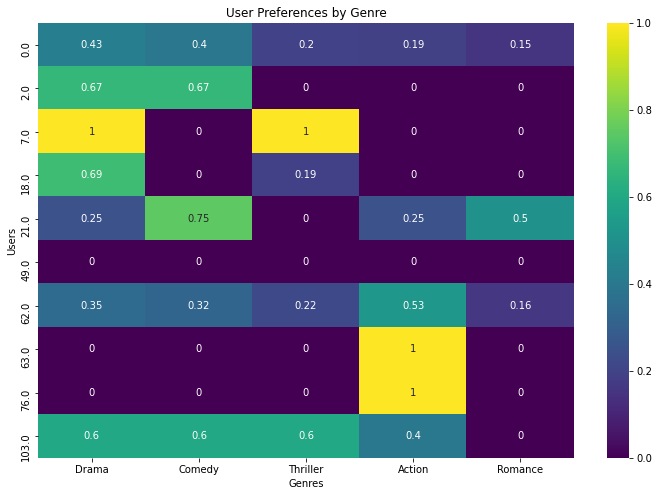

In [ ]:


plt.figure(figsize=(12, 8))
sns.heatmap(preferences, annot=True, cmap='viridis', vmin=0, vmax=1, cbar=True)
plt.title('User Preferences by Genre')
plt.xlabel('Genres')
plt.ylabel('Users')
plt.show()


From the above visualization we can personalize users gener preference by looking at users history for example user 5 prefers action movies compared to the Drama movies. We therefore recommend more action movies to user5.

MODELLING
